# Paired T-Test for Equivalence using TOST (Two One-Sided Tests)

In [4]:
import pandas as pd
df = pd.read_csv('dataset\\Data-sets\\blood_pressure.csv')

In [5]:
sample_size = df.shape[0]
sample_size

120

In [6]:
df['difference'] = df['bp_before'] - df['bp_after']

### It is necessary to confirm the distribution is approximately uniform and check for outliers.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [8]:
%matplotlib inline
np.random.seed(8)
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

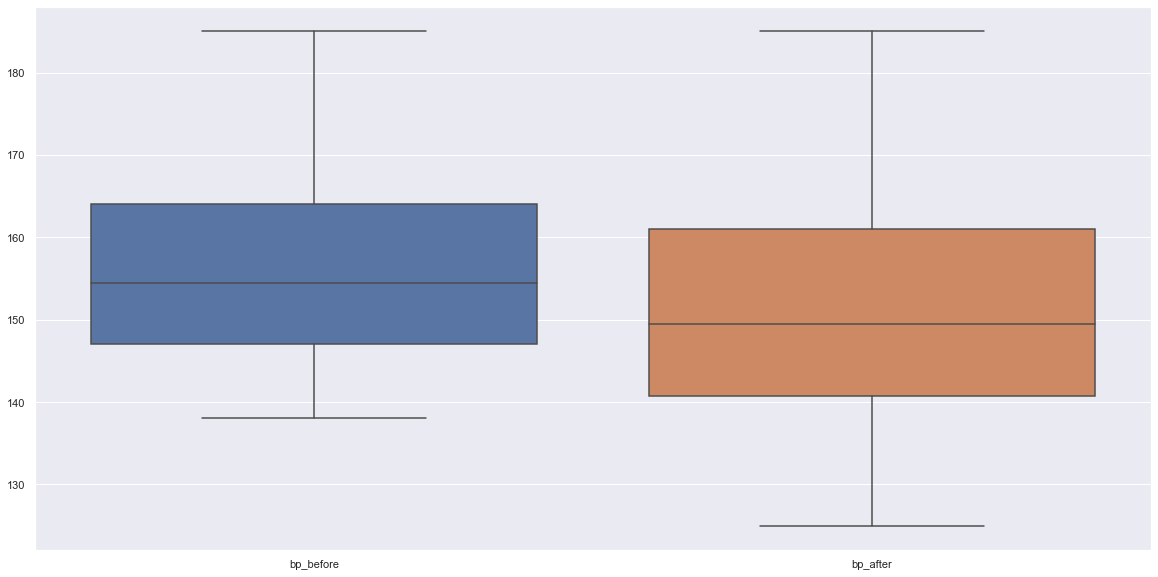

In [9]:
# check for outliers (samples)
plt.figure()
ax = sns.boxplot(data=df[['bp_before','bp_after']])

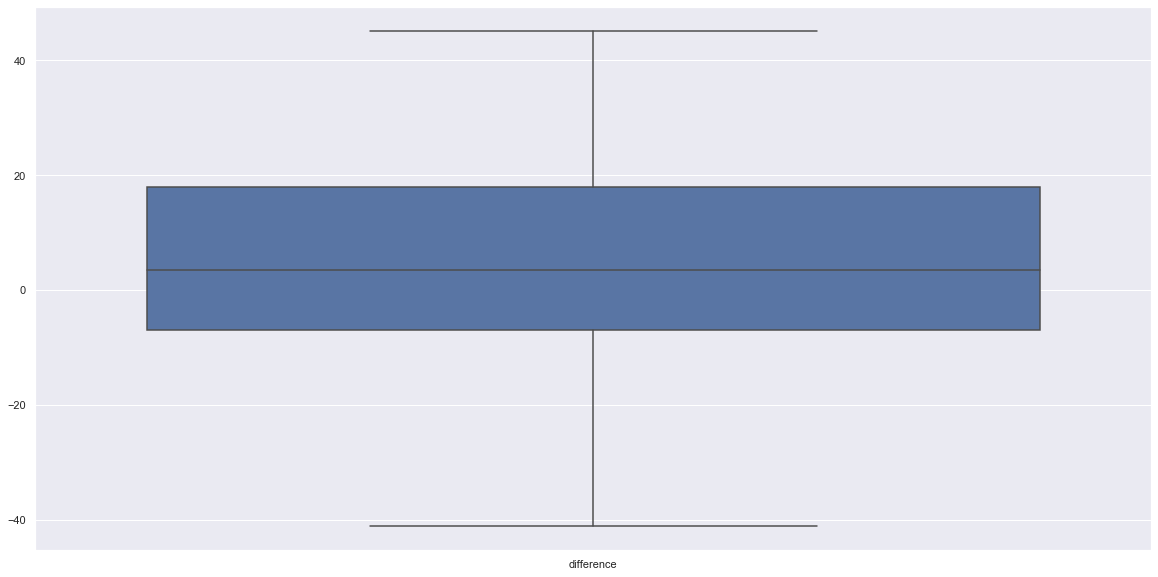

In [10]:
# check for outliers (difference)
plt.figure()
ax = sns.boxplot(data=df[['difference']])

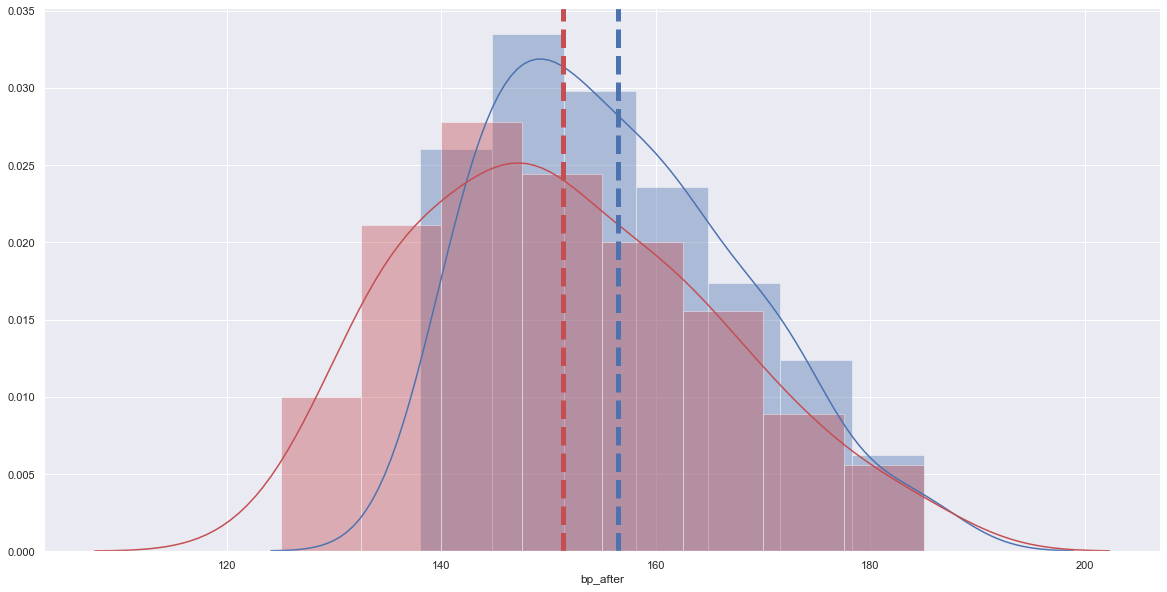

In [11]:
# check for normal distribution (samples)
plt.figure()
ax1 = sns.distplot(df['bp_before'], color='b')
ax2 = sns.distplot(df['bp_after'], color='r')
plt.axvline(np.mean(df['bp_before']), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(df['bp_after']),  color='r', linestyle='dashed', linewidth=5)

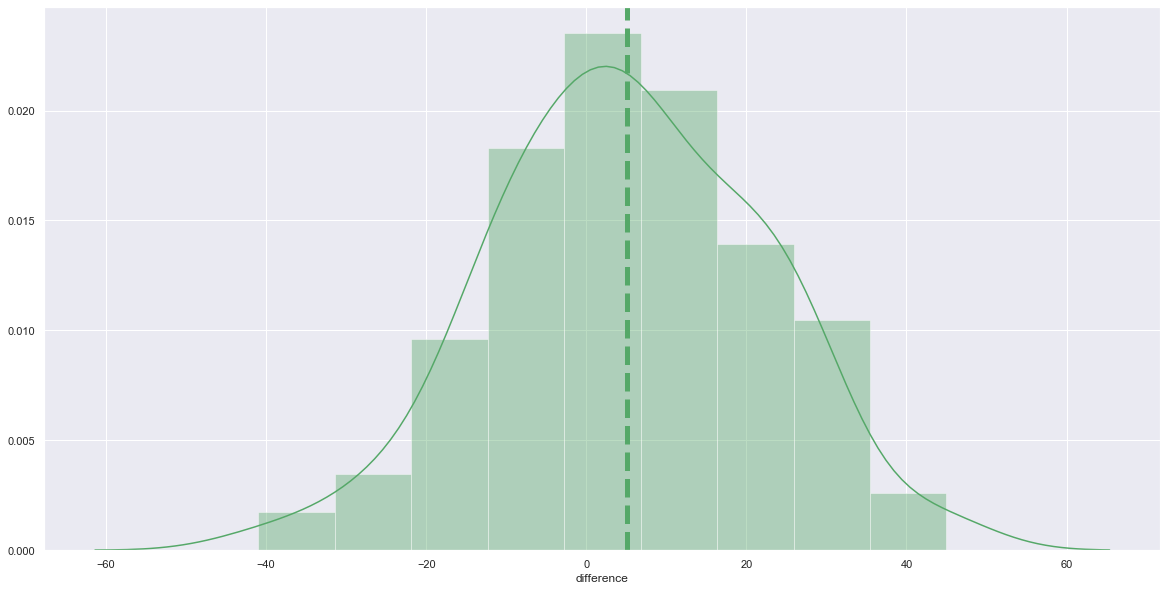

In [12]:
# check for normal distribution (difference)
plt.figure()
ax1 = sns.distplot(df['difference'], color='g')
plt.axvline(np.mean(df['difference']), color='g',  linestyle='dashed', linewidth=5)

### Setting Equivalence Bounds (confidence interval)

In equivalence test is necessary to establish a confidence interval (low/high bounds).

I will use a 95% confidence interval (statistical_significance = 0.05)


In [13]:
confidence_interval = .95
statistical_significance = 0.05

In [14]:
# code from: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [15]:
[m, mn, mp] = mean_confidence_interval(df['difference'], confidence_interval)
print('mean', m)
print('mean-', mn)
print('mean+', mp)

mean 5.091666666666667
mean- 2.0705568567756942
mean+ 8.11277647655764


### Compute TOST (using statsmodels)

http://www.statsmodels.org/0.9.0/generated/statsmodels.stats.weightstats.ttost_paired.html#statsmodels.stats.weightstats.ttost_paired


In [16]:
# http://www.statsmodels.org/0.9.0/generated/statsmodels.stats.weightstats.ttost_paired.html#statsmodels.stats.weightstats.ttost_paired
# statsmodels.stats.weightstats.ttost_paired(x1, x2, low, upp, transform=None, weights=None)[source]

from statsmodels.stats import weightstats

# null hypothesis: md < low or md > upp alternative hypothesis: low < md < upp

[pvalue, tuple1, tuple2] = weightstats.ttost_paired(x1=df['bp_before'], x2=df['bp_after'], low=mn, upp=mp)

# Returns:	
#pvalue (float) – pvalue of the non-equivalence test
#t1, pv1, df1 (tuple) – test statistic, pvalue and degrees of freedom for lower threshold test
#t2, pv2, df2 (tuple) – test statistic, pvalue and degrees of freedom for upper threshold test

[t_1, p_value_1, degrees_of_freedom_1] = tuple1
[t_2, p_value_2, degrees_of_freedom_2] = tuple2

print('pvalue', pvalue)
print('t_1, p_value_1, degrees_of_freedom_1', t_1, p_value_1, degrees_of_freedom_1)
print('t_2, p_value_2, degrees_of_freedom_2', t_2, p_value_2, degrees_of_freedom_2)

pvalue 0.02500000000176085
t_1, p_value_1, degrees_of_freedom_1 1.9800998764260063 0.02500000000176085 119.0
t_2, p_value_2, degrees_of_freedom_2 -1.9800998764260065 0.025000000001760832 119.0


In [18]:
# (copied from wikipedia...) When both these one-sided tests can be statistically rejected, we can
# conclude that –ΔL < Δ < ΔU, or that the observed effect falls within the equivalence bounds and is
# statistically smaller than any effect deemed worthwhile, and considered practically equivalent

# If the calculated p-value is below the threshold chosen for statistical significance
# (usually the 0.10, the 0.05, or 0.01 level), then the null hypothesis is rejected in favor
# of the alternative hypothesis.

if (p_value_1  < statistical_significance) and (p_value_2 < statistical_significance):
    print('REJECT H0 ! - we are confident the distributions are equivalent !')
else:
    print('CANNOT REJECT H0...')

REJECT H0 ! - we are confident the distributions are equivalent !
